<a href="https://colab.research.google.com/github/bhanvi05/Cryptographic-Analysis-and-Sbox-Modification-in-Lightweight-Ciphers/blob/main/present.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = "/content/drive/MyDrive/Present_cipher_project"
print("Files in folder:", os.listdir(path))


Files in folder: ['encrypted_images']


In [ ]:
import zipfile
import os
import shutil
from google.colab import drive

drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/present_sbox"
output_dir = "/content/present_buckets_raw"
os.makedirs(output_dir, exist_ok=True)

zip_map = {
    "present_normal_images.zip": "class_0",
    "present_3to1_cipher.zip": "class_1",
    "present_3to2_cipher.zip": "class_2",
    "present_3to5_images.zip": "class_3",
}

for zip_name, class_name in zip_map.items():
    zip_path = os.path.join(base_dir, zip_name)
    extract_path = os.path.join(output_dir, class_name)
    os.makedirs(extract_path, exist_ok=True)

    print(f"Checking for zip file: {zip_path}")
    if not os.path.exists(zip_path):
        print(f"File not found: {zip_path}")
        continue

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extracted {zip_name} to {extract_path}")
    except zipfile.BadZipFile:
        print(f"Corrupted zip file: {zip_name}")
    except Exception as e:
        print(f"Unexpected error with {zip_name}: {e}")

for class_name in zip_map.values():
    class_path = os.path.join(output_dir, class_name)
    nested_dir = os.path.join(class_path, "encrypted_images")

    if os.path.exists(nested_dir) and os.path.isdir(nested_dir):
        files = os.listdir(nested_dir)
        for fname in files:
            shutil.move(os.path.join(nested_dir, fname), class_path)
        os.rmdir(nested_dir)
        print(f"Flattened: Moved files to {class_path}")
    else:
        print(f"No nested folder in {class_name}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checking for zip file: /content/drive/MyDrive/present_sbox/present_normal_images.zip
Extracted present_normal_images.zip to /content/present_buckets_raw/class_0
Checking for zip file: /content/drive/MyDrive/present_sbox/present_3to1_cipher.zip
Extracted present_3to1_cipher.zip to /content/present_buckets_raw/class_1
Checking for zip file: /content/drive/MyDrive/present_sbox/present_3to2_cipher.zip
Extracted present_3to2_cipher.zip to /content/present_buckets_raw/class_2
Checking for zip file: /content/drive/MyDrive/present_sbox/present_3to5_images.zip
Extracted present_3to5_images.zip to /content/present_buckets_raw/class_3
No nested folder in class_0
Flattened: Moved files to /content/present_buckets_raw/class_1
Flattened: Moved files to /content/present_buckets_raw/class_2
Flattened: Moved files to /content/present_buckets_raw/class_3


In [ ]:
import zipfile
import os
import shutil

base_dir = "/content/drive/MyDrive/present_sbox"
output_dir = "/content/present_buckets_raw"

# --- Added: Clear the output directory before starting ---
if os.path.exists(output_dir):
    print(f"Clearing existing output directory: {output_dir}")
    shutil.rmtree(output_dir)
# --- End Added ---

os.makedirs(output_dir, exist_ok=True)

zip_map = {
    "present_normal_images.zip": "class_0",
    "present_3to1_cipher.zip": "class_1",
    "present_3to5_images.zip": "class_2",
    "present_3to2_cipher.zip": "class_3",
}

for zip_name, class_name in zip_map.items():
    zip_path = os.path.join(base_dir, zip_name)
    extract_path = os.path.join(output_dir, class_name)
    os.makedirs(extract_path, exist_ok=True)

    print(f"\nChecking for zip file: {zip_path}")
    if not os.path.exists(zip_path):
        print(f"ERROR: Zip file not found at {zip_path}")
        print(f"Contents of {base_dir}:")
        try:
            for item in os.listdir(base_dir):
                print(f"  - '{item}'")
        except FileNotFoundError:
            print(f"  - Folder '{base_dir}' does not exist.")
        continue
    else:
        print(f"Zip file found: {zip_path}")

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extracted '{zip_name}' to '{extract_path}'")
    except zipfile.BadZipFile:
        print(f"ERROR: '{zip_name}' is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"ERROR: Unexpected issue while processing '{zip_name}': {e}")

for class_name in zip_map.values():
    class_path = os.path.join(output_dir, class_name)
    nested_dir = os.path.join(class_path, "encrypted_images")
    if os.path.exists(nested_dir) and os.path.isdir(nested_dir):
        for fname in os.listdir(nested_dir):
            source_path = os.path.join(nested_dir, fname)
            destination_path = os.path.join(class_path, fname)

            if os.path.exists(destination_path):
                print(f"Warning: Destination file '{destination_path}' already exists. Removing.")
                os.remove(destination_path)

            shutil.move(source_path, destination_path)

        os.rmdir(nested_dir)
        print(f"Flattened: Moved contents from 'encrypted_images' to '{class_path}'")
    else:
        print(f"No nested folder in '{class_name}'")

Clearing existing output directory: /content/present_buckets_raw

Checking for zip file: /content/drive/MyDrive/present_sbox/present_normal_images.zip
Zip file found: /content/drive/MyDrive/present_sbox/present_normal_images.zip
Extracted 'present_normal_images.zip' to '/content/present_buckets_raw/class_0'

Checking for zip file: /content/drive/MyDrive/present_sbox/present_3to1_cipher.zip
Zip file found: /content/drive/MyDrive/present_sbox/present_3to1_cipher.zip
Extracted 'present_3to1_cipher.zip' to '/content/present_buckets_raw/class_1'

Checking for zip file: /content/drive/MyDrive/present_sbox/present_3to5_images.zip
Zip file found: /content/drive/MyDrive/present_sbox/present_3to5_images.zip
Extracted 'present_3to5_images.zip' to '/content/present_buckets_raw/class_2'

Checking for zip file: /content/drive/MyDrive/present_sbox/present_3to2_cipher.zip
Zip file found: /content/drive/MyDrive/present_sbox/present_3to2_cipher.zip
Extracted 'present_3to2_cipher.zip' to '/content/presen

In [ ]:
import os

input_root = "/content/present_buckets_raw"

for class_name in sorted(os.listdir(input_root)):
    class_path = os.path.join(input_root, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.endswith((".png", ".jpg"))]
        print(f"{class_name}: {len(images)} images")
    else:
        print(f"Skipping {class_name} - not a directory.")

class_0: 50000 images
class_1: 50000 images
class_2: 50000 images
class_3: 50000 images


In [ ]:
import zipfile
import os
import shutil

zip_path = "/content/drive/MyDrive/present_sbox/present_3to1_cipher.zip"
extract_path = "/content/present_buckets_raw/class_1"

if os.path.exists(extract_path):
    shutil.rmtree(extract_path)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Re-extracted class_1 from present_3to1_cipher.zip")


Re-extracted class_1 from present_3to1_cipher.zip


In [ ]:
import os
import shutil
import zipfile

input_root = "/content/present_buckets_raw"

for class_name in sorted(os.listdir(input_root)):
    class_path = os.path.join(input_root, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith((".png", ".jpg"))]
    print(f"{class_name}: {len(images)} images")

extract_path = "/content/present_buckets_raw/class_1"
shutil.rmtree(extract_path, ignore_errors=True)
os.makedirs(extract_path, exist_ok=True)

zip_path = "/content/drive/MyDrive/present_sbox/present_3to1_cipher.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

nested_dir = os.path.join(extract_path, "encrypted_images")
if os.path.exists(nested_dir) and os.path.isdir(nested_dir):
    for fname in os.listdir(nested_dir):
        shutil.move(os.path.join(nested_dir, fname), extract_path)
    os.rmdir(nested_dir)

print("Re-extracted and flattened class_1")

images = [img for img in os.listdir(extract_path) if img.endswith((".png", ".jpg"))]
print(f"class_1 now has {len(images)} images")


class_0: 50000 images
class_1: 0 images
class_2: 50000 images
class_3: 50000 images
Re-extracted and flattened class_1
class_1 now has 50000 images


In [ ]:
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split

zip_path = "/content/drive/MyDrive/present_sbox/present_3to1_cipher.zip"
extract_path = "/content/present_buckets_raw/class_1"
shutil.rmtree(extract_path, ignore_errors=True)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if member.endswith(".png"):
            filename = os.path.basename(member)
            if not filename:
                continue
            source = zip_ref.open(member)
            target = open(os.path.join(extract_path, filename), "wb")
            with source, target:
                shutil.copyfileobj(source, target)

print("Flattened extraction of class_1 completed.")

class_path = "/content/present_buckets_raw/class_1"
images = [img for img in os.listdir(class_path) if img.endswith(".png")]
print(f"class_1 now has {len(images)} images")

zip_path = "/content/drive/MyDrive/present_sbox/present_3to2_cipher.zip"
extract_path = "/content/present_buckets_raw/class_3"
shutil.rmtree(extract_path, ignore_errors=True)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if member.endswith(".png"):
            filename = os.path.basename(member)
            if not filename:
                continue
            source = zip_ref.open(member)
            target = open(os.path.join(extract_path, filename), "wb")
            with source, target:
                shutil.copyfileobj(source, target)

print("Flattened extraction of class_3 completed.")

images = os.listdir("/content/present_buckets_raw/class_3")
print(f"class_3 now has {len(images)} images")

input_root = "/content/present_buckets_raw"
output_root = "/content/present_buckets_split"
train_dir = os.path.join(output_root, "train")
val_dir = os.path.join(output_root, "val")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

val_split = 0.2
max_images = 50000

for class_name in sorted(os.listdir(input_root)):
    class_path = os.path.join(input_root, class_name)
    if not os.path.isdir(class_path):
        continue

    images = sorted([img for img in os.listdir(class_path) if img.endswith((".png", ".jpg"))])[:max_images]
    if len(images) == 0:
        print(f"Skipping {class_name} — no images found.")
        continue

    train_imgs, val_imgs = train_test_split(images, test_size=val_split, random_state=42)

    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))

    print(f"{class_name}: {len(train_imgs)} train, {len(val_imgs)} val images")

print("All classes split into train/val successfully.")


Flattened extraction of class_1 completed.
class_1 now has 50000 images
Flattened extraction of class_3 completed.
class_3 now has 50000 images
class_0: 40000 train, 10000 val images
class_1: 40000 train, 10000 val images
class_2: 40000 train, 10000 val images
class_3: 40000 train, 10000 val images
All classes split into train/val successfully.


In [ ]:
# alexnet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

alexnet_model = Sequential([
    Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

alexnet_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/present_buckets_split/train"
val_dir = "/content/present_buckets_split/val"
# Rescale pixels to [0,1]
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)

Found 160000 images belonging to 4 classes.
Found 40000 images belonging to 4 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = alexnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.9938 - loss: 0.0205 - val_accuracy: 0.9621 - val_loss: 0.1108
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9935 - loss: 0.0242 - val_accuracy: 0.8881 - val_loss: 0.5051
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9940 - loss: 0.0221 - val_accuracy: 0.9875 - val_loss: 0.0529
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9950 - loss: 0.0201 - val_accuracy: 0.8867 - val_loss: 0.4957
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9963 - loss: 0.0137 - val_accuracy: 0.9414 - val_loss: 0.2364
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9955 - loss: 0.0200 - val_accuracy: 0.9326 - val_loss: 0.5421
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.9966 - loss: 0.0129 - val_accuracy: 0.9823 - val_loss: 0.2331
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9971 -

In [ ]:
alexnet_model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=12,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 13/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9922 - loss: 0.0336 - val_accuracy: 0.9587 - val_loss: 0.1994
Epoch 14/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy: 0.9610 - val_loss: 0.1696
Epoch 15/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.9151 - val_loss: 0.4464
Epoch 16/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9968 - loss: 0.0119 - val_accuracy: 0.9852 - val_loss: 0.0648
Epoch 17/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9970 - loss: 0.0130 - val_accuracy: 0.9089 - val_loss: 1.1595
Epoch 18/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.9966 - loss: 0.0126 - val_accuracy: 0.8708 - val_loss: 1.1676
Epoch 19/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9965 - loss: 0.0142 - val_accuracy: 0.9893 - val_loss: 0.0642
Epoch 20/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 

In [ ]:
alexnet_model.save("alexnet_present_model.keras")

In [ ]:
val_generator_no_shuffle = datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

alexnet_model.evaluate(val_generator_no_shuffle)

Found 40000 images belonging to 4 classes.
  1/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9766 - loss: 0.2572

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9822 - loss: 0.0897


[0.059545934200286865, 0.9863499999046326]

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
def build_mobilenet(input_shape=(32, 32, 3), num_classes=4):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = mobilenet_block(x, filters=64, strides=1)
    x = mobilenet_block(x, filters=128, strides=2)
    x = mobilenet_block(x, filters=128, strides=1)
    x = mobilenet_block(x, filters=256, strides=2)
    x = mobilenet_block(x, filters=256, strides=1)
    x = mobilenet_block(x, filters=512, strides=2)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [ ]:
mobilenet_model = build_mobilenet()
mobilenet_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator_no_shuffle,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.8939 - loss: 0.2502 - val_accuracy: 0.9724 - val_loss: 0.0783
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.9878 - loss: 0.0342 - val_accuracy: 0.9637 - val_loss: 0.1082
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9924 - loss: 0.0215 - val_accuracy: 0.9797 - val_loss: 0.0616
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.6187 - val_loss: 2.3994
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.9951 - loss: 0.0135 - val_accuracy: 0.7480 - val_loss: 1.1702
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.8410 - val_loss: 0.6615
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9949 - val_loss: 0.0155
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.9974 -

In [ ]:
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_alexnet = alexnet_model.fit(
    train_generator,
    validation_data=val_generator_no_shuffle,
    batch_size=128,
    epochs=50,
    callbacks=[early_stopping]
)

mobilenet_model.save('/content/drive/MyDrive/present_sbox/mobilenet_present_cipher.keras')
alexnet_model.save('/content/drive/MyDrive/present_sbox/alexnet_present_cipher.keras')


with open('/content/drive/MyDrive/present_sbox/alexnet_history.pkl', 'wb') as f:
    pickle.dump(history_alexnet.history, f)

with open('/content/drive/MyDrive/present_sbox/mobilenet_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9972 - loss: 0.0118 - val_accuracy: 0.9713 - val_loss: 0.1234
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9977 - loss: 0.0093 - val_accuracy: 0.9779 - val_loss: 0.1357
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9982 - loss: 0.0077 - val_accuracy: 0.9786 - val_loss: 0.1409
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9979 - loss: 0.0094 - val_accuracy: 0.9886 - val_loss: 0.0629
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9921 - val_loss: 0.0322
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9906 - val_loss: 0.0558
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9854 - val_loss: 0.0590
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9979 -

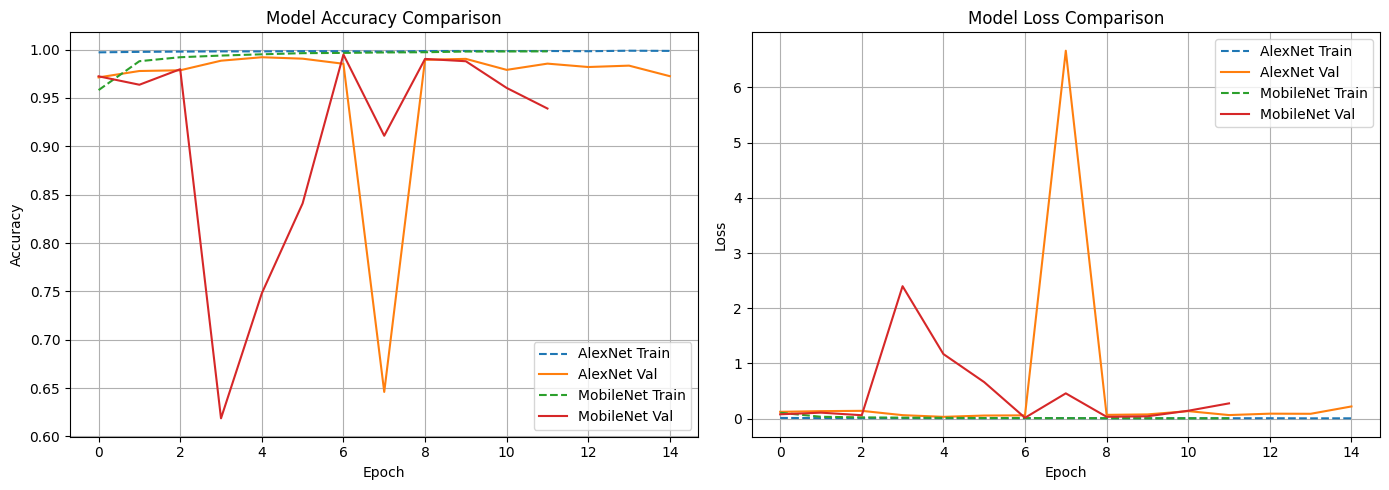

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/present_sbox/alexnet_history.pkl', 'rb') as f:
    alexnet_hist = pickle.load(f)

with open('/content/drive/MyDrive/present_sbox/mobilenet_history.pkl', 'rb') as f:
    mobilenet_hist = pickle.load(f)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(alexnet_hist['accuracy'], label='AlexNet Train', linestyle='--')
plt.plot(alexnet_hist['val_accuracy'], label='AlexNet Val', linestyle='-')
plt.plot(mobilenet_hist['accuracy'], label='MobileNet Train', linestyle='--')
plt.plot(mobilenet_hist['val_accuracy'], label='MobileNet Val', linestyle='-')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alexnet_hist['loss'], label='AlexNet Train', linestyle='--')
plt.plot(alexnet_hist['val_loss'], label='AlexNet Val', linestyle='-')
plt.plot(mobilenet_hist['loss'], label='MobileNet Train', linestyle='--')
plt.plot(mobilenet_hist['val_loss'], label='MobileNet Val', linestyle='-')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Streaming output truncated to the last 5000 lines.
  adding: content/present_buckets_split/train/class_0/train_encrypted_47056.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_18957.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_41423.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_15806.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_12130.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_30488.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_45075.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_48267.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_32084.png (stored 0%)
  adding: content/present_buckets_split/train/class_0/train_encrypted_5335.png (stored 0%)
  adding: content/present_buck

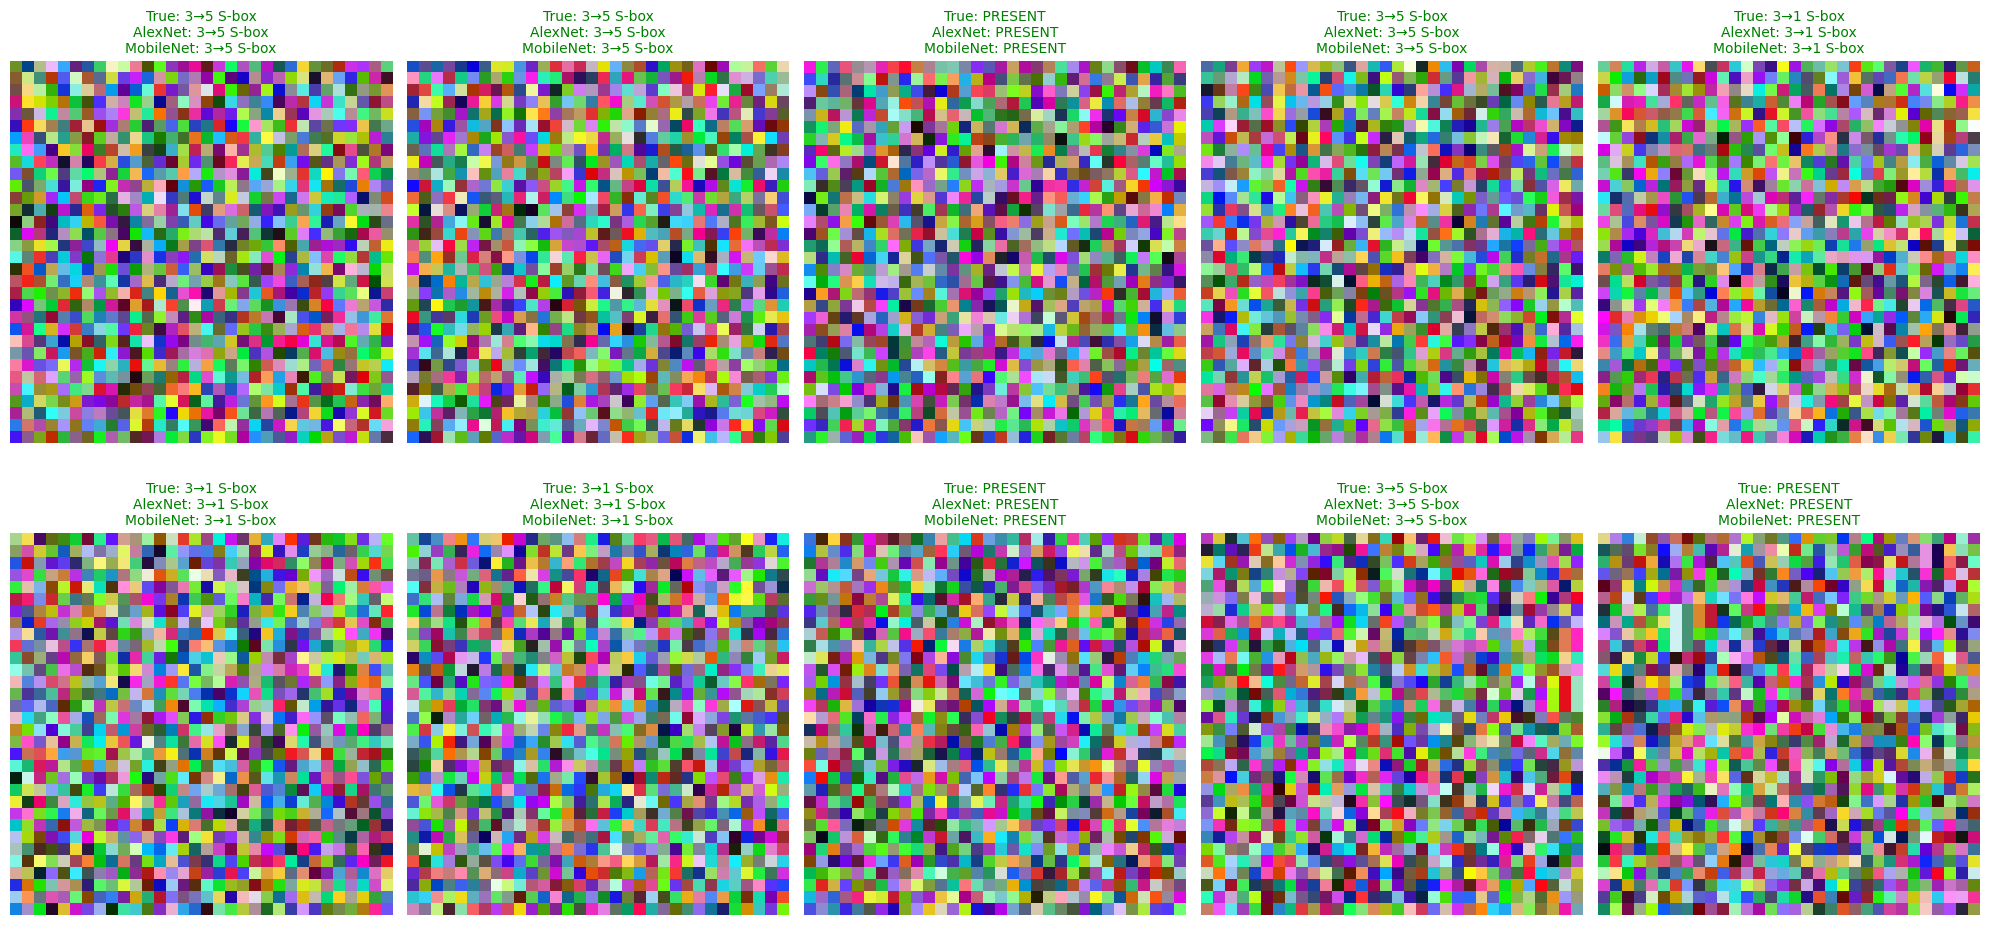

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

alexnet_model = load_model('/content/drive/MyDrive/present_sbox/alexnet_present_cipher.keras')
mobilenet_model = load_model('/content/drive/MyDrive/present_sbox/mobilenet_present_cipher.keras')

!zip -r "/content/drive/MyDrive/present_sbox/present_buckets_split.zip" "/content/present_buckets_split"

val_dir = "/content/present_buckets_split/val"

datagen = ImageDataGenerator(rescale=1./255)
val_generator_no_shuffle = datagen.flow_from_directory(
    val_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

X_test, y_test = [], []
for i in range(len(val_generator_no_shuffle)):
    x_batch, y_batch = val_generator_no_shuffle[i]
    X_test.append(x_batch)
    y_test.append(y_batch)

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

class_names = ['PRESENT', '3→2 S-box', '3→5 S-box', '3→1 S-box']

y_pred_alexnet = np.argmax(alexnet_model.predict(X_test), axis=1)
y_pred_mobilenet = np.argmax(mobilenet_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(20, 10))
for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx]
    true_label = y_true[idx]
    pred_alex = y_pred_alexnet[idx]
    pred_mobilenet = y_pred_mobilenet[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow((img * 255).astype("uint8"))
    title = f"True: {class_names[true_label]}\nAlexNet: {class_names[pred_alex]}\nMobileNet: {class_names[pred_mobilenet]}"
    color = "green" if (pred_alex == true_label and pred_mobilenet == true_label) else "red"
    plt.title(title, color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/present_sbox/alexnet_vs_mobilenet_predictions.png")
plt.show()